<a href="https://colab.research.google.com/github/geiseramosbra/transfer-learning/blob/main/Projeto%20de%20Transfer%20Learning%20com%20dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving PetImages.zip to PetImages (1).zip


In [ ]:
import zipfile
import os

# Nome do arquivo enviado
zip_path = "PetImages.zip"

# Extrair
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(".")

# Verifica se as pastas estão corretas
os.listdir("PetImages")


['Dog', 'Cat']

In [ ]:
import PIL
from PIL import Image

folder_path = 'PetImages'

for category in ['Cat', 'Dog']:
    path = os.path.join(folder_path, category)
    for img_name in os.listdir(path):
        try:
            img_path = os.path.join(path, img_name)
            img = Image.open(img_path)
            img.verify()  # Verifica se a imagem está ok
        except:
            os.remove(img_path)


/usr/local/lib/python3.11/dist-packages/PIL/TiffImagePlugin.py:950: UserWarning: Truncated File Read
  warnings.warn(str(msg))


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Normalização: divide por 255 para deixar valores entre 0 e 1
datagen = ImageDataGenerator(validation_split=0.2, rescale=1./255)

train_generator = datagen.flow_from_directory(
    'PetImages',
    target_size=(160, 160),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    'PetImages',
    target_size=(160, 160),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)


Found 20000 images belonging to 2 classes.
Found 4998 images belonging to 2 classes.


In [ ]:
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(160, 160, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
from tensorflow.keras import layers, models

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1, activation='sigmoid')  # saída binária
])


In [ ]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [ ]:
history = model.fit(
    train_generator,
    epochs=3,
    validation_data=val_generator
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 562s 885ms/step - accuracy: 0.9355 - loss: 0.1590 - val_accuracy: 0.9728 - val_loss: 0.0743
Epoch 2/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 599s 945ms/step - accuracy: 0.9772 - loss: 0.0623 - val_accuracy: 0.9758 - val_loss: 0.0629
Epoch 3/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 571s 913ms/step - accuracy: 0.9805 - loss: 0.0544 - val_accuracy: 0.9784 - val_loss: 0.0596


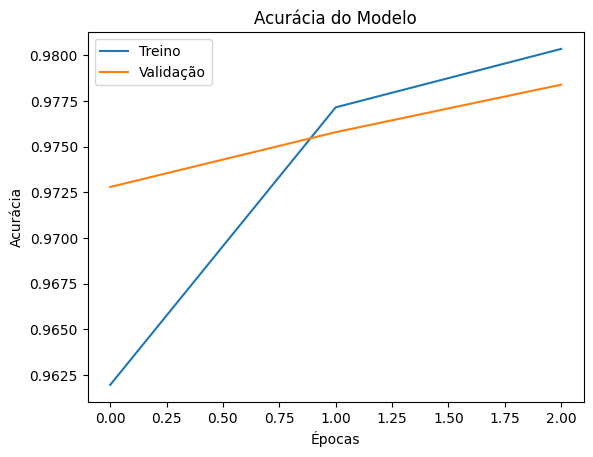

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Treino')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.title("Acurácia do Modelo")
plt.xlabel("Épocas")
plt.ylabel("Acurácia")
plt.legend()
plt.show()
